In [4]:
import pandas as pd

df=pd.read_csv(r"C:\Users\preet\Desktop\home.llc\home_loan_interest.csv")
df.head()

,DATE,MORTGAGE30US
0,02-01-1987,9.37
1,09-01-1987,9.32
2,16-01-1987,9.21
3,23-01-1987,9.04
4,30-01-1987,9.08


In [7]:
df.DATE=pd.to_datetime(df.DATE,format='%d-%m-%Y')
df.head()

,DATE,MORTGAGE30US
0,1987-01-02,9.37
1,1987-01-09,9.32
2,1987-01-16,9.21
3,1987-01-23,9.04
4,1987-01-30,9.08


In [28]:
newdf=pd.DataFrame(columns=['DATE','INTEREST'])
i=0
while i<len(df):
    tempdate=df.DATE[i]
    tempdate.replace(day=1)
    #if 5 weeks in month
    if df.DATE[i+4].month==df.DATE[i+3].month:
        tempinterest=df.MORTGAGE30US[i:i+5].mean()
        i+=5
    else:
        tempinterest=df.MORTGAGE30US[i:i+3].mean()
        i+=4
    newdf.loc[i]=[tempdate,tempinterest]


In [29]:
newdf.head(n=20)

,DATE,INTEREST
5,1987-01-02,9.204000
9,1987-02-06,9.086667
13,1987-03-06,9.036667
17,1987-04-03,9.653333
22,1987-05-01,10.596000
26,1987-06-05,10.600000
31,1987-07-03,10.278000
35,1987-08-07,10.330000
39,1987-09-04,10.843333
44,1987-10-02,11.260000


In [31]:
newdf.to_csv(r"C:\Users\preet\Desktop\home.llc\home_loan_interest_new.csv")

In [29]:
import pandas as pd
df=pd.read_csv(r"C:\Users\preet\Desktop\home.llc\hcai.csv")
df.Year=df.Year.astype(str)
for i in range(len(df)):
    if df.Quarter[i]==1:
        df.Year[i]=df.Year[i]+'/01/01'
    elif df.Quarter[i]==2:
        df.Year[i]=df.Year[i]+'/01/04'
    elif df.Quarter[i]==3:
        df.Year[i]=df.Year[i]+'/01/07'
    elif df.Quarter[i]==4:
        df.Year[i]=df.Year[i]+'/01/10'
df.Year=pd.to_datetime(df.Year,format='%Y/%d/%m')
df.drop(['Quarter'],axis=1,inplace=True)
df.head()

C:\Users\preet\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\preet\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\preet\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\preet\

,Year,Risk
0,1998-01-01,10.024
1,1998-04-01,9.668
2,1998-07-01,10.491
3,1998-10-01,12.708
4,1999-01-01,12.709


In [30]:
# convert to period
df['Year'] = pd.to_datetime(df['Year']).dt.to_period('M')

# set Date as index and resample
df=df.set_index('Year').resample('M').interpolate('linear')
df.head(n=20)

,Risk
Year,
1998-01,10.024000
1998-02,9.905333
1998-03,9.786667
1998-04,9.668000
1998-05,9.942333
1998-06,10.216667
1998-07,10.491000
1998-08,11.230000
1998-09,11.969000


<AxesSubplot:xlabel='Year'>

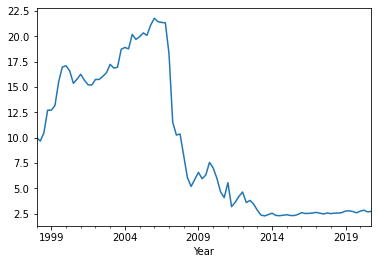

In [31]:
df.Risk.plot()

In [32]:
df.to_csv(r"C:\Users\preet\Desktop\home.llc\hcai_monthly.csv")

In [33]:
#checking if all are equal
pop=pd.read_csv(r"C:\Users\preet\Desktop\home.llc\population.csv")
len(pop)

276

In [35]:
hcai=pd.read_csv(r"C:\Users\preet\Desktop\home.llc\hcai_monthly.csv")
len(hcai)

276

In [36]:
gdp=pd.read_csv(r"C:\Users\preet\Desktop\home.llc\gdp_percapita.csv")
len(gdp)

92

In [43]:
# convert to period
df=pd.read_csv(r"C:\Users\preet\Desktop\home.llc\gdp_percapita.csv")
df.DATE=pd.to_datetime(df.DATE,format='%d-%m-%Y')
# set Date as index and resample


In [44]:
df.head()

,DATE,A939RX0Q048SBEA
0,1998-01-01,43062
1,1998-04-01,43342
2,1998-07-01,43748
3,1998-10-01,44321
4,1999-01-01,44627


In [45]:
df['DATE'] = pd.to_datetime(df['DATE']).dt.to_period('M')
df=df.set_index('DATE').resample('M').interpolate()
df.head(n=20)

,A939RX0Q048SBEA
DATE,
1998-01,43062.000000
1998-02,43155.333333
1998-03,43248.666667
1998-04,43342.000000
1998-05,43477.333333
1998-06,43612.666667
1998-07,43748.000000
1998-08,43939.000000
1998-09,44130.000000


In [47]:
df.to_csv(r"C:\Users\preet\Desktop\home.llc\gdp_percapita_monthly.csv")

In [48]:
gdp=pd.read_csv(r"C:\Users\preet\Desktop\home.llc\gdp_percapita_monthly.csv")
len(gdp)

276

In [50]:
supply=pd.read_csv(r"C:\Users\preet\Desktop\home.llc\house_supply.csv")
len(supply)

276

In [51]:
interest=pd.read_csv(r"C:\Users\preet\Desktop\home.llc\interest_monthly.csv")
len(interest)

276

In [52]:
new_houses=pd.read_csv(r"C:\Users\preet\Desktop\home.llc\new_houses.csv")
len(new_houses)

276

In [53]:
import os
os.chdir(r"C:\Users\preet\Desktop\home.llc")
for i in os.listdir('data'):
    temp_df=pd.read_csv(r"C:\Users\preet\Desktop\home.llc\data\\"+i)
    print(len(temp_df))

276
276
276
276
276
276
276
